# Plot the log-likelihood contours of a distribution

In this example, we show how to plot the bidimensionnal log-likelihood contours of function given a sample.

In [1]:
import openturns as ot
ot.RandomGenerator.SetSeed(0)

## Generate a sample

We create a `TruncatedNormal` and generate a small sample.

In [2]:
a = -1
b=2.5
mu = 2.
sigma = 3.
distribution = ot.TruncatedNormal(mu,sigma,a,b)
sample = distribution.getSample(11)

In order to see the distribution and the sample, we draw the PDF of the distribution and generate a clouds which X coordinates are the sample values.

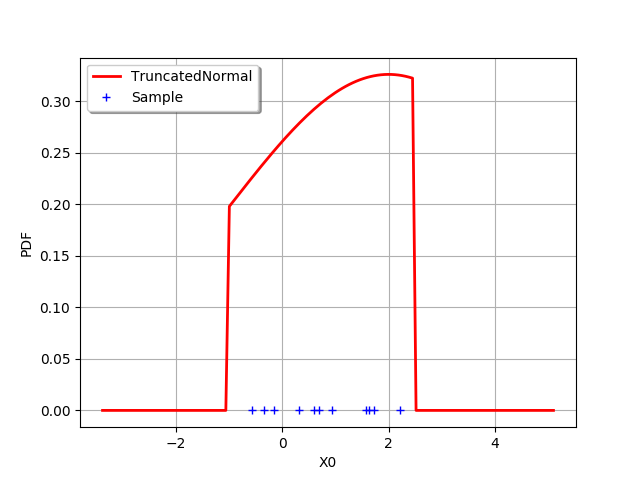

In [3]:
graph = distribution.drawPDF()
graph.setLegends(["TruncatedNormal"])
graph.setColors(["red"])
zeros = ot.Sample(sample.getSize(),1)
cloud = ot.Cloud(sample,zeros)
cloud.setLegend("Sample")
graph.add(cloud)
graph.setLegendPosition("topleft")
graph

The following function computes the log-likelihood of a `TruncatedNormal` which mean and standard deviations are given as input arguments. The lower and upper bounds of the distribution are computed as minimum and maximum of the sample.

## Define the log-likelihood function

The following function evaluates the log-likelihood function given a point X=$(\mu,\sigma$). In order to evaluate the likelihood on the sample, we use a trick: we evaluate the `computeMean` method on the log-PDF sample, then multiply by the sample size. This is much faster than using a `for` loop.

In [4]:
def logLikelihood(X):
    '''
    Evaluate the log-likelihood of a TruncatedNormal on a sample. 
    '''
    mu = X[0]
    sigma = X[1]
    a = sample.getMin()[0]
    b = sample.getMax()[0]
    distribution = ot.TruncatedNormal(mu,sigma,a,b)
    samplesize = sample.getSize()
    samplelogpdf = distribution.computeLogPDF(sample)
    loglikelihood = -samplelogpdf.computeMean()* samplesize
    return loglikelihood

## With the draw method

In this section, we use the `draw` method which is available for any `Function` which has 1 or 2 input arguments. In our case, the log-likelihood function has two inputs: $x_0=\mu$ and $x_1=\sigma$.

Draw the log-likelihood function with the `draw` method: this is much faster than using a `for` loop.  In order to print LaTeX X and Y labels, we use the `"r"` character in front of the string containing the LaTeX command.

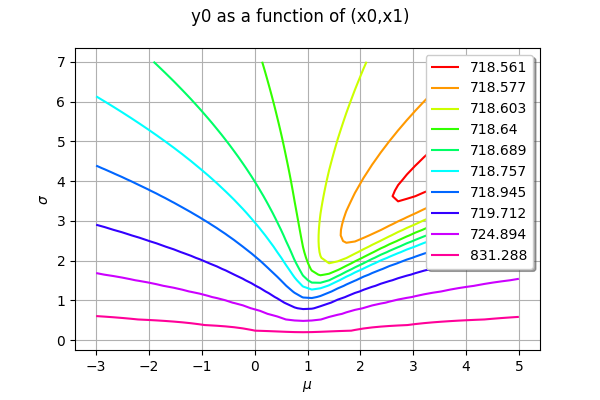

In [5]:
logLikelihoodFunction = ot.PythonFunction(2, 1, logLikelihood)
graphBasic = logLikelihoodFunction.draw([-3.0, 0.1], [5.0, 7.0], [50]*2)
graphBasic.setXTitle(r"$\mu$")
graphBasic.setYTitle(r"$\sigma$")
graphBasic

## Customizing the number of levels

The level values are computed from the quantiles of the data, so that the contours are equally spaced. We can configure the number of levels by setting the `Contour-DefaultLevelsNumber` key in the `ResourceMap`. 

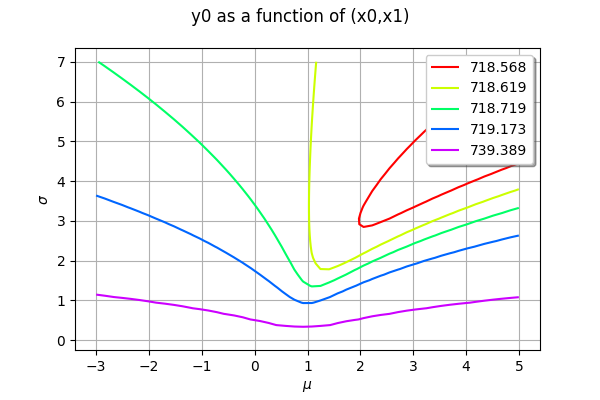

In [6]:
ot.ResourceMap_SetAsUnsignedInteger("Contour-DefaultLevelsNumber",5)
logLikelihoodFunction = ot.PythonFunction(2, 1, logLikelihood)
graphBasic = logLikelihoodFunction.draw([-3.0, 0.1], [5.0, 7.0], [50]*2)
graphBasic.setXTitle(r"$\mu$")
graphBasic.setYTitle(r"$\sigma$")
graphBasic

A part of the graphics is hidden by the legends. This is why we fine tune the graphics in the next examples.

## Getting the level values

The level values can be retrieved with the `getLevels` method.

In [7]:
drawables = graphBasic.getDrawables()
levels = []
for i in range(len(drawables)):
    contours = drawables[i]
    levels.append(contours.getLevels()[0])
levels

[718.5684597785707,
 718.6192768074003,
 718.7190152026697,
 719.1730640192839,
 739.3886556889302]

## Monochrome contour plot

We first configure the contour plot. By default each level is a dedicated contour in order to have one color per contour, but they all share the same grid and data. We use the `getDrawable` method to take the first contour as the only one with multiple levels. Then we use the `setLevels` method: we ask for many iso-values in the same data so the color will be the same for all curves. In order to inline the level values labels, we use the `setDrawLabels` method. 

In [8]:
contours = graphBasic.getDrawable(0)
contours.setLevels(levels)
contours.setDrawLabels(True)

Then we create a new graph. Finally, we use the `setDrawables` to substitute the collection of drawables by a collection reduced to this unique contour.

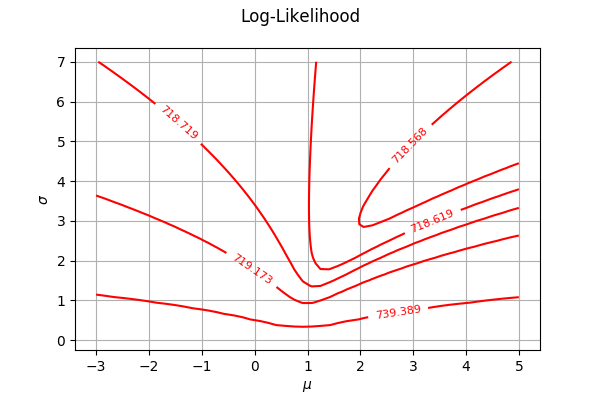

In [9]:
graphFineTune = ot.Graph("Log-Likelihood", r"$\mu$", r"$\sigma$", True, '')
graphFineTune.setDrawables([contours])
graphFineTune.setLegendPosition("") # Remove the legend
graphFineTune

## Multicolor contour plot

The previous contour plot is fine, but lacks of colors. It is not obvious that the colors make the plot clearer given that the values in the contour plot are so different: some adjacent contours have close levels, while others are very different. Anyway, it is obviously nicer to get a colored graphics. 

The following script first creates a palette of colors with the `BuildDefaultPalette` class. Before doing so, we configure the `Drawable-DefaultPalettePhase` `ResourceMap` key so that the number of generated colors corresponds to the number of levels. Then we create the `drawables` list, where each item is a single contour with its own level and color. 

In [10]:
# Take the first contour as the only one with multiple levels
contour = graphBasic.getDrawable(0)
# Build a range of colors
ot.ResourceMap.SetAsUnsignedInteger('Drawable-DefaultPalettePhase', len(levels))
palette = ot.Drawable.BuildDefaultPalette(len(levels))
# Create the drawables list, appending each contour with its own color
drawables = list()
for i in range(len(levels)):
    contour.setLevels([levels[i]])
    # Inline the level values
    contour.setDrawLabels(True)
    # We have to copy the drawable because a Python list stores only pointers
    drawables.append(ot.Drawable(contour))

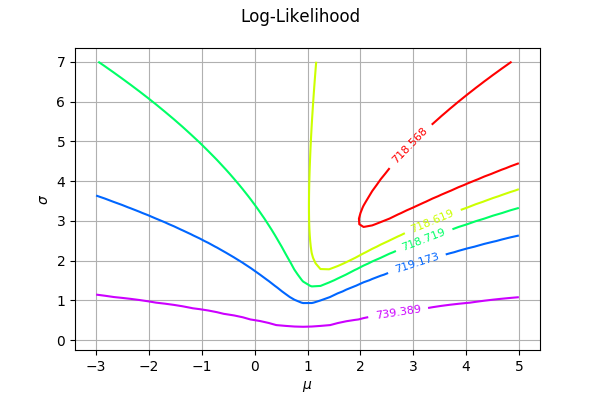

In [11]:
graphFineTune = ot.Graph("Log-Likelihood", r"$\mu$", r"$\sigma$", True, '')
graphFineTune.setDrawables(drawables) # Replace the drawables
graphFineTune.setLegendPosition("") # Remove the legend
graphFineTune.setColors(palette) # Add colors
graphFineTune